In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [207]:
from sklearn.linear_model import LinearRegression, Ridge

In [208]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [209]:
df = pd.read_csv("buenos-aires-real-estate-1.csv")

In [210]:
df = wrangle('buenos-aires-real-estate-1.csv')

In [211]:
def wrangle(n):
    df = pd.read_csv(n)

    mask_ba = df['place_with_parent_names'].str.contains("Capital Federal")
    mask_apt = df['property_type']== 'apartment'
    mask_price = df['price_aprox_usd'] < 400000
    df = df[mask_ba & mask_apt & mask_price]

    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df= df[mask_area]

    df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True)
    df.lat = df['lat'].astype(float)
    df.lon = df['lon'].astype(float)
    return df

In [212]:
X = df[['surface_covered_in_m2']]
y = df[['price_aprox_usd']]

In [213]:
y.isnull().sum()

price_aprox_usd    0
dtype: int64

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [215]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [216]:
prediction = model.predict(X_test)

In [217]:
model_mse = mean_squared_error(y_test, prediction)

In [218]:
model_mae = mean_absolute_error(y_test, prediction)

In [219]:
model.score(X_train, y_train)

0.5198760569453639

In [220]:
print(model_mse)

2378641257.8529873


In [226]:
X = df[['lat', 'lon']]
y = df['price_aprox_usd']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [228]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [229]:
prediction1 = model1.predict(X_test)

In [230]:
model1.score(X_train, y_train)

0.950029697506077

In [156]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,Neighborhood
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693,12
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115,47
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957,10
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382,16
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511,25


In [231]:
df['Neighborhood'] = df['place_with_parent_names'].str.split('|', expand=True)[3]

In [232]:
encoder = LabelEncoder()

In [233]:
df['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])

In [234]:
X = df[['Neighborhood']]
y = df['price_aprox_usd']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [165]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [236]:
prediction2 = model2.predict(X_test)

In [237]:
model2.score(X_train, y_train)

0.2661948980338351

In [262]:
files = glob.glob('buenos-aires-real-estate-*.csv')
frames = [wrangle(file) for file in files]
df = pd.concat(frames)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6582 entries, 7 to 8603
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   6582 non-null   object 
 1   property_type               6582 non-null   object 
 2   place_with_parent_names     6582 non-null   object 
 3   lat-lon                     6316 non-null   object 
 4   price                       6582 non-null   float64
 5   currency                    6582 non-null   object 
 6   price_aprox_local_currency  6582 non-null   float64
 7   price_aprox_usd             6582 non-null   float64
 8   surface_total_in_m2         4752 non-null   float64
 9   surface_covered_in_m2       6582 non-null   float64
 10  price_usd_per_m2            4536 non-null   float64
 11  price_per_m2                6582 non-null   float64
 12  floor                       1900 non-null   float64
 13  rooms                       5286 non-n

In [264]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
7,sell,apartment,|Argentina|Capital Federal|Villa General Mitre|,"-34.616004,-58.470506",120000.0,USD,1819488.00,120000.0,NaN,55.0,NaN,2181.818182,NaN,2.0,NaN,http://villa-general-mitre.properati.com.ar/xx...,-34.616004,-58.470506
20,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.584712,-58.444927",89000.0,USD,1349453.60,89000.0,NaN,37.0,NaN,2405.405405,7.0,2.0,NaN,http://palermo.properati.com.ar/ya5i_venta_dep...,-34.584712,-58.444927
21,sell,apartment,|Argentina|Capital Federal|Saavedra|,"-34.5546524,-58.4936437",183495.0,USD,2782224.58,183495.0,92.0,57.0,1994.51087,3219.210526,NaN,2.0,NaN,http://saavedra.properati.com.ar/12izq_venta_d...,-34.554652,-58.493644
41,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.6105808,-58.4796249",95000.0,USD,1440428.00,95000.0,53.0,47.0,1792.45283,2021.276596,NaN,2.0,NaN,http://villa-del-parque.properati.com.ar/wy0n_...,-34.610581,-58.479625
43,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5582269,-58.4583569",95000.0,USD,1440428.00,95000.0,0.0,35.0,NaN,2714.285714,NaN,1.0,NaN,http://belgrano.properati.com.ar/xw9a_venta_de...,-34.558227,-58.458357


In [265]:
df['Neighborhood'] = df['place_with_parent_names'].str.split('|', expand=True)[3]

In [266]:
encoder = LabelEncoder()

In [267]:
df['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])

In [268]:
X = df[['surface_covered_in_m2', 'Neighborhood', 'lat', 'lon']]
y = df['price_aprox_usd']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [288]:
model4 = Pipeline([
    ('si', SimpleImputer(strategy='mean')),
    ('dtr', DecisionTreeRegressor())
])

In [289]:
model4.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('dtr', DecisionTreeRegressor())])

In [290]:
prediction = model4.predict(X_test)

In [291]:
model4.score(X_train, y_train)

0.9955747277159948

In [276]:
model4_mse = mean_squared_error(y_test, prediction)

In [277]:
model4_mae = mean_absolute_error(y_test, prediction)

In [278]:
print(model4_mse)

1696621852.7649722


In [279]:
print(model4_mae)

26154.822703357193


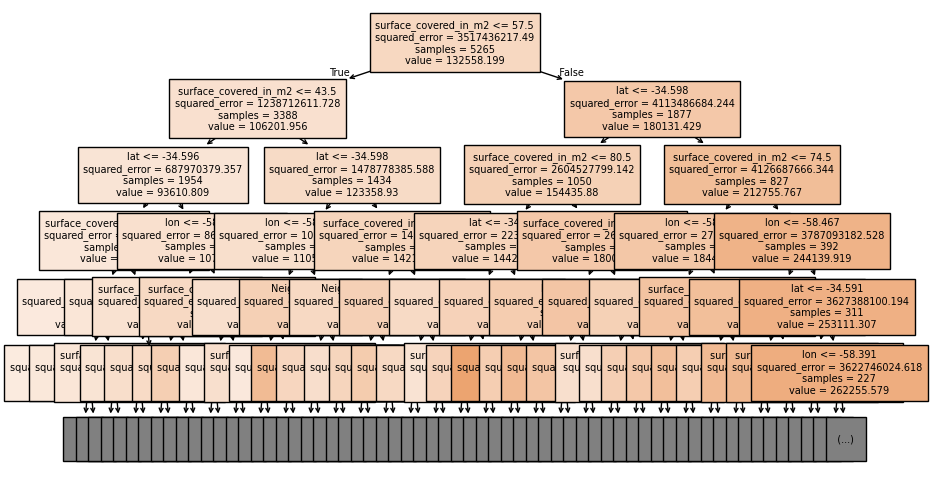

In [292]:
plt.figure(figsize=(10,6))
plot_tree(model4.named_steps['dtr'], filled=True, feature_names=['surface_covered_in_m2', 'Neighborhood', 'lat', 'lon'], 
          max_depth=5, fontsize=7)
plt.show()